In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/unet

/content/drive/MyDrive/unet


In [8]:
%pwd

'/content/drive/MyDrive/unet'

In [ ]:
!unzip veriseti.zip -d /content/drive/MyDrive/unet

Archive:  veriseti.zip
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label93.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label95.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label49.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label75.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label64.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label76.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label6.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label85.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label52.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label84.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label90.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label73.tif  
  inflating: /content/drive/MyDrive/unet/dataset/test/label/label45.tif  
  inflating: /co

In [9]:
import os
import cv2
import random

import numpy as np
from PIL import Image
from keras.optimizers import Adam

import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

In [10]:
image_directory ="/content/drive/MyDrive/unet/dataset/train/data"
mask_directory = "/content/drive/MyDrive/unet/dataset/train/label"

SIZE = 256

In [11]:
image_dataset = []
mask_dataset = []

images = os.listdir(image_directory)
masks = os.listdir(mask_directory)

print(images)
print(masks)

['train100.tif', 'train0.tif', 'train103.tif', 'train10.tif', 'train101.tif', 'train104.tif', 'train102.tif', 'train1.tif', 'train115.tif', 'train131.tif', 'train123.tif', 'train132.tif', 'train125.tif', 'train109.tif', 'train129.tif', 'train108.tif', 'train112.tif', 'train114.tif', 'train124.tif', 'train122.tif', 'train118.tif', 'train105.tif', 'train12.tif', 'train107.tif', 'train119.tif', 'train11.tif', 'train130.tif', 'train120.tif', 'train126.tif', 'train13.tif', 'train113.tif', 'train121.tif', 'train106.tif', 'train110.tif', 'train128.tif', 'train111.tif', 'train117.tif', 'train116.tif', 'train127.tif', 'train134.tif', 'train144.tif', 'train152.tif', 'train155.tif', 'train139.tif', 'train150.tif', 'train157.tif', 'train153.tif', 'train140.tif', 'train143.tif', 'train146.tif', 'train133.tif', 'train148.tif', 'train145.tif', 'train156.tif', 'train159.tif', 'train158.tif', 'train142.tif', 'train135.tif', 'train15.tif', 'train16.tif', 'train136.tif', 'train141.tif', 'train149.tif', '

In [12]:
images = sorted(images)
masks = sorted(masks)

In [13]:
print(images)
print(masks)

['train0.tif', 'train1.tif', 'train10.tif', 'train100.tif', 'train101.tif', 'train102.tif', 'train103.tif', 'train104.tif', 'train105.tif', 'train106.tif', 'train107.tif', 'train108.tif', 'train109.tif', 'train11.tif', 'train110.tif', 'train111.tif', 'train112.tif', 'train113.tif', 'train114.tif', 'train115.tif', 'train116.tif', 'train117.tif', 'train118.tif', 'train119.tif', 'train12.tif', 'train120.tif', 'train121.tif', 'train122.tif', 'train123.tif', 'train124.tif', 'train125.tif', 'train126.tif', 'train127.tif', 'train128.tif', 'train129.tif', 'train13.tif', 'train130.tif', 'train131.tif', 'train132.tif', 'train133.tif', 'train134.tif', 'train135.tif', 'train136.tif', 'train137.tif', 'train138.tif', 'train139.tif', 'train14.tif', 'train140.tif', 'train141.tif', 'train142.tif', 'train143.tif', 'train144.tif', 'train145.tif', 'train146.tif', 'train147.tif', 'train148.tif', 'train149.tif', 'train15.tif', 'train150.tif', 'train151.tif', 'train152.tif', 'train153.tif', 'train154.tif', '

In [14]:
for img_path, label_path in zip(images, masks):
  print("resim yolu: ", img_path)
  print("etiket yolu: ", label_path)

resim yolu:  train0.tif
etiket yolu:  label0.tif
resim yolu:  train1.tif
etiket yolu:  label1.tif
resim yolu:  train10.tif
etiket yolu:  label10.tif
resim yolu:  train100.tif
etiket yolu:  label100.tif
resim yolu:  train101.tif
etiket yolu:  label101.tif
resim yolu:  train102.tif
etiket yolu:  label102.tif
resim yolu:  train103.tif
etiket yolu:  label103.tif
resim yolu:  train104.tif
etiket yolu:  label104.tif
resim yolu:  train105.tif
etiket yolu:  label105.tif
resim yolu:  train106.tif
etiket yolu:  label106.tif
resim yolu:  train107.tif
etiket yolu:  label107.tif
resim yolu:  train108.tif
etiket yolu:  label108.tif
resim yolu:  train109.tif
etiket yolu:  label109.tif
resim yolu:  train11.tif
etiket yolu:  label11.tif
resim yolu:  train110.tif
etiket yolu:  label110.tif
resim yolu:  train111.tif
etiket yolu:  label111.tif
resim yolu:  train112.tif
etiket yolu:  label112.tif
resim yolu:  train113.tif
etiket yolu:  label113.tif
resim yolu:  train114.tif
etiket yolu:  label114.tif
resim

In [15]:
for i, image_name in enumerate(images):

  if (image_name.split(".")[1] == "tif"):
    path = image_directory + "/" + image_name
    image = cv2.imread(path, 0)

    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))

    image_dataset.append(np.array(image))

In [16]:
for i, mask_name in enumerate(masks):

  if (mask_name.split(".")[1] == "tif"):
    path = mask_directory + "/" + mask_name
    mask = cv2.imread(path, 0)

    mask = Image.fromarray(mask)
    mask = mask.resize((SIZE, SIZE))

    mask_dataset.append(np.array(mask))

In [17]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis = 1), 3)
print(image_dataset.shape)

mask_dataset = np.expand_dims(np.array(mask_dataset), 3) / 255.
print(mask_dataset.shape)

(165, 256, 256, 1)
(165, 256, 256, 1)


In [18]:
X_train, X_val, y_train, y_val = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 42)

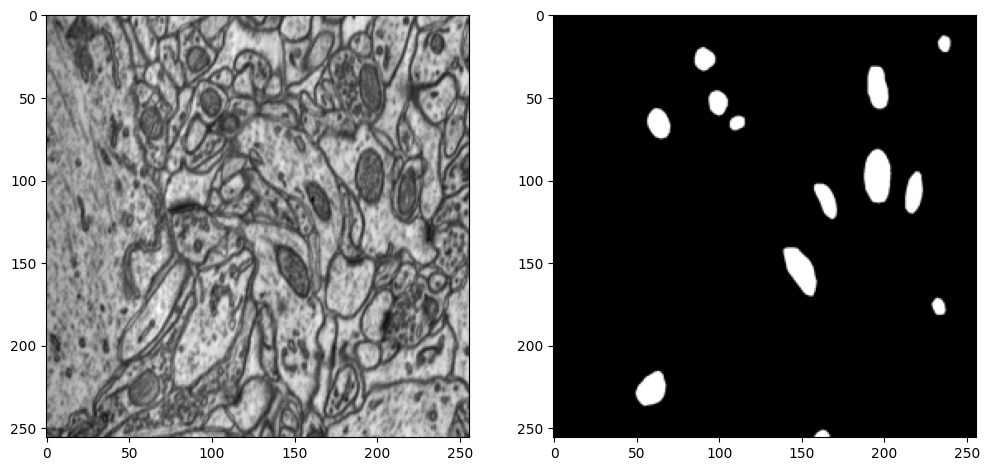

In [19]:
image_number = random.randint(0, len(X_train))

plt.figure(figsize = (12,6))

plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256,256)), cmap = "gray")

plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256,256)), cmap = "gray")

plt.show()

In [20]:
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding = "same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding = "same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [21]:
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x,p

In [22]:
def decoder_block(inputs, skip, num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides = 2, padding = "same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)
  return x

In [23]:
def build_unet(input_shape):
  inputs = Input(input_shape)

  # encoder
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # bridge
  b1 = conv_block(p4, 1024)

  # decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(1,1,padding = "same", activation = "sigmoid")(d4)

  model = Model(inputs, outputs, name = "UNET")

  return model

In [24]:
input_shape = (256,256,1)
model = build_unet(input_shape)

In [25]:
model.summary()

Model: "UNET"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 256, 256, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 31,054,145 (118.46 MB)

 Trainable params: 31,042,369 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [26]:
model.compile(optimizer = Adam(learning_rate = 1e-3), loss = "binary_crossentropy", metrics = ["accuracy"])

In [27]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    verbose = 1,
                    epochs = 20,
                    validation_data = (X_val, y_val),
                    shuffle = False)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.4939 - loss: 0.8425 - val_accuracy: 0.0571 - val_loss: 12011.1357
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 812ms/step - accuracy: 0.9421 - loss: 0.2779 - val_accuracy: 0.0799 - val_loss: 151.0031
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 827ms/step - accuracy: 0.9552 - loss: 0.1773 - val_accuracy: 0.0715 - val_loss: 9.2624
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 843ms/step - accuracy: 0.9647 - loss: 0.1361 - val_accuracy: 0.5000 - val_loss: 36.5332
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 884ms/step - accuracy: 0.9691 - loss: 0.1140 - val_accuracy: 0.0935 - val_loss: 53.0777
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 857ms/step - accuracy: 0.9723 - loss: 0.0994 - val_accuracy: 0.3295 - val_loss: 20.2252
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 885ms/step - accuracy: 0.9742 - loss: 0.0900 - val_accuracy: 0.3345 - val_loss: 30.3499
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 845ms/step - accuracy: 0.9766 - loss: 0.0800 - 

In [28]:
model.save("/content/drive/MyDrive/unet/model_20_epoch.keras")

In [ ]:
history.history

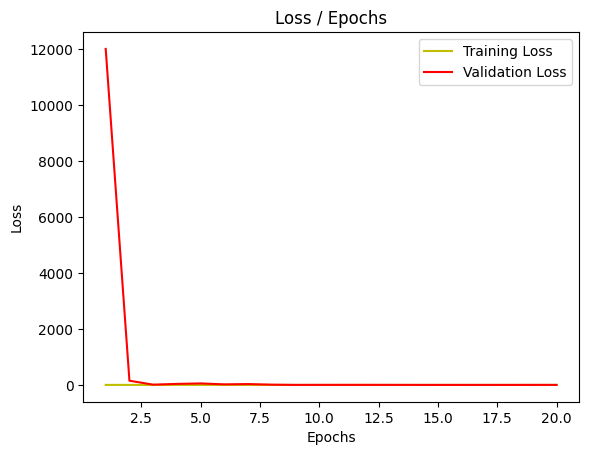

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, "y", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")

plt.title("Loss / Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

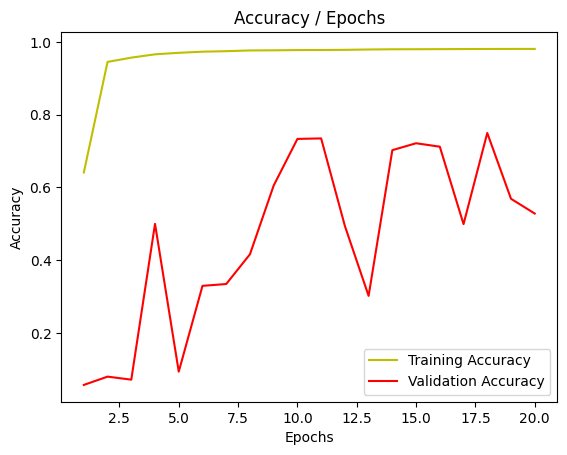

In [34]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, "y", label = "Training Accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation Accuracy")

plt.title("Accuracy / Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [35]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/unet/model_20_epoch.keras")

In [37]:
from tensorflow.keras.metrics import MeanIoU
import random

y_prediction = model.predict(X_val)
y_prediction_th = y_prediction > 0.5

num_classes = 1
IOU = MeanIoU(num_classes = num_classes)
IOU.update_state(y_prediction_th, y_val)
print("Mean IOU = ", IOU.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step
Mean IOU =  0.9999999


In [38]:
threshold = 0.5
test_number = random.randint(0, len(X_val) -1)
test_img = X_val[test_number]
ground_truth = y_val[test_number]
test_input = np.expand_dims(test_img, 0)
prediction = (model.predict(test_input)[0, :,:,0]>0.5).astype(np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


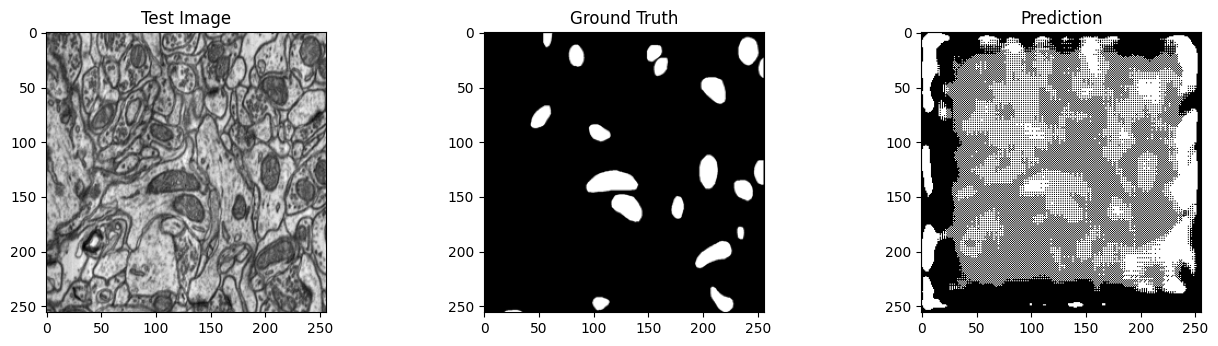

In [39]:
plt.figure(figsize = (16,8))

plt.subplot(231)
plt.title("Test Image")
plt.imshow(test_img[:,:,0], cmap = "gray")

plt.subplot(232)
plt.title("Ground Truth")
plt.imshow(ground_truth[:,:,0], cmap = "gray")

plt.subplot(233)
plt.title("Prediction")
plt.imshow(prediction, cmap = "gray")

plt.show()

In [40]:
_, train_acc = model.evaluate(X_train, y_train, verbose = 0)
_, test_acc = model.evaluate(X_val, y_val, verbose = 0)

In [41]:
print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

train_acc:  0.5282682180404663
test_acc:  0.5283149480819702
